# Projekt 2 - Torus Płaski

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Jasne! Oto gotowy, zwięzły i czytelny fragment do wklejenia bezpośrednio do **Markdowna w Jupyterze** – bez LaTeX-a, tak aby wszystko się poprawnie wyświetlało 👇

---

## Odległości punktów na torusie – intuicja, teoria i przykład

**Torus** to przestrzeń „owinięta” w obu kierunkach – matematycznie można ją sobie wyobrazić jako prostokąt, którego przeciwległe boki zostały połączone. Jeśli obiekt „wyjdzie” z prawej strony, pojawia się z lewej; jeśli przekroczy górną krawędź – wraca od dołu.

Dobrym porównaniem jest klasyczna gra **Snake**:

* kiedy wąż przekroczy jedną krawędź planszy, pojawia się po drugiej stronie,
* plansza nie ma więc „brzegów”, tylko działa jak powierzchnia zapętlona – właśnie jak torus.

---

### Dlaczego zwykła odległość nie działa

Na płaskiej płaszczyźnie odległość między punktami P = (x1, y1) i Q = (x2, y2) to:


$$d = \sqrt((x_1 - x_2)^2 + (y_1 - y_2)^2)
$$

Jednak na torusie takie podejście może być mylące.
Przykład: jeśli pracujemy na kwadracie [0, 1) × [0, 1):

* P = (0.95, 0.5)
* Q = (0.05, 0.5)

Klasyczna odległość wynosi 0.90, ale ponieważ można „przejść przez krawędź”, na torusie punkty dzieli tylko 0.10 jednostki.

---

### Jak liczyć odległość na torusie

Zamiast brać bezpośrednią różnicę współrzędnych, obliczamy **minimalną z dwóch możliwych dróg** – wprost albo „naokoło” przez granicę:

```
Δx = min(|x1 - x2|, Lx - |x1 - x2|)
Δy = min(|y1 - y2|, Ly - |y1 - y2|)
d  = sqrt(Δx^2 + Δy^2)
```

gdzie Lx i Ly to długości boku przestrzeni w osi x i y (np. 1.0).

---

### Przykład

Dla przestrzeni [0, 1) × [0, 1):

* P = (0.95, 0.10)
* Q = (0.05, 0.90)

Obliczamy:

* Δx = min(0.90, 1 - 0.90) = 0.10
* Δy = min(0.80, 1 - 0.80) = 0.20

Odległość na torusie:

```
d = sqrt(0.10^2 + 0.20^2) ≈ 0.2236
```

Na zwykłej płaszczyźnie byłoby to ok. 1.204 – czyli znacznie dalej!

---

### Zastosowania

* modele biologiczne i ekologiczne z warunkami periodycznymi,
* symulacje fizyczne cząstek w przestrzeni z „wrap-around”,
* topologiczna analiza danych z cyklicznymi zmiennymi (np. czas doby, kąty),
* gry komputerowe (np. Snake), gdzie mapa nie ma brzegów.

---

✅ **Podsumowanie:**
Odległość na torusie mierzy „najkrótszą możliwą drogę” z uwzględnieniem cyklicznej natury przestrzeni. Dzięki temu poprawnie opisuje relacje między punktami w przestrzeniach zapętlonych, gdzie ruch przez krawędzie jest dozwolony – dokładnie tak jak w planszy gry Snake.


In [2]:
np.random.seed(42)
n = 5
Lx = 0.5
Ly = 0.5
points = [(x, y) for x, y in zip(np.random.uniform(-Lx, Lx, n), np.random.uniform(-Ly, Ly, n))]
points

[(np.float64(-0.1254598811526375), np.float64(-0.34400547966379735)),
 (np.float64(0.45071430640991617), np.float64(-0.44191638783180054)),
 (np.float64(0.2319939418114051), np.float64(0.3661761457749352)),
 (np.float64(0.0986584841970366), np.float64(0.1011150117432088)),
 (np.float64(-0.3439813595575635), np.float64(0.2080725777960455))]

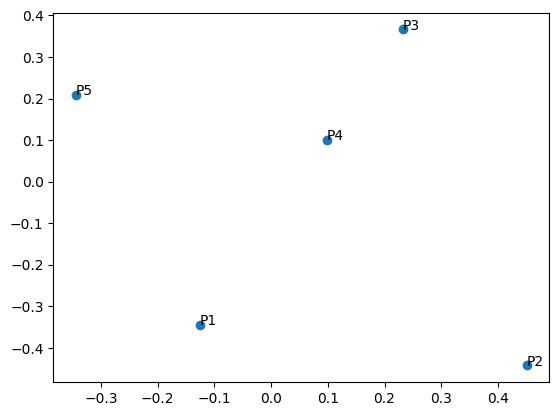

In [3]:
plt.scatter(*zip(*points))
for i, (x, y) in enumerate(points, 1):
    plt.text(x, y, f"P{i}")
plt.show()

In [4]:
r = np.zeros((n,n))
r

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [5]:
for i in range(n):
    for j in range(n):
        r[i,j] = torus_distance(points[i], points[j], Lx, Ly)
r


array([[0.        , 0.12405262, 0.25396009, 0.23073968, 0.2246414 ],
       [0.12405262, 0.        , 0.37783542, 0.15407524, 0.33066936],
       [0.25396009, 0.37783542, 0.        , 0.27013814, 0.1754109 ],
       [0.23073968, 0.15407524, 0.27013814, 0.        , 0.12136766],
       [0.2246414 , 0.33066936, 0.1754109 , 0.12136766, 0.        ]])

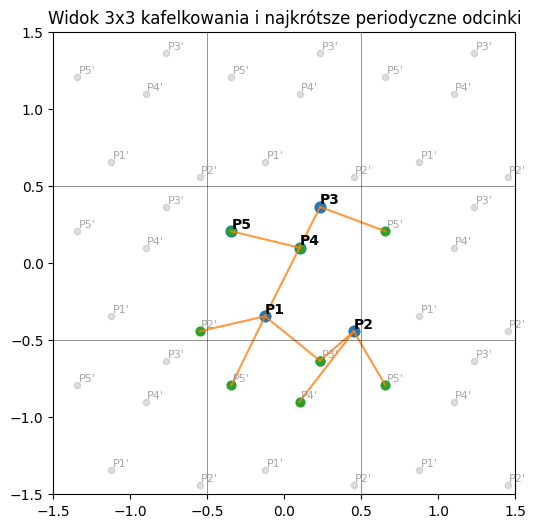

Macierz odległości r:
[[0.     0.1241 0.254  0.2307 0.2246]
 [0.1241 0.     0.3778 0.1541 0.3307]
 [0.254  0.3778 0.     0.2701 0.1754]
 [0.2307 0.1541 0.2701 0.     0.1214]
 [0.2246 0.3307 0.1754 0.1214 0.    ]]


In [12]:
# Visualizacja najkrótszych odcinków na torusie (3x3 kafelkowanie)
# Zakładamy, że points, Lx, Ly, n, r są już zdefiniowane w notatniku

def torus_distance(p, q, Lx, Ly):
    """Zwraca odległość periodyczną między punktami p i q na torusie.
    Zakładamy, że współrzędne leżą w przedziale [-Lx, Lx] × [-Ly, Ly],
    więc szerokości fundamentalnego prostokąta to 2*Lx i 2*Ly.
    """
    wx = 2 * Lx
    wy = 2 * Ly
    dx = abs(p[0] - q[0])
    dy = abs(p[1] - q[1])
    dx = min(dx, wx - dx)
    dy = min(dy, wy - dy)
    return np.hypot(dx, dy)


def torus_shortest_image(q, p, Wx, Wy):
    """Zwraca (odległość, obraz punktu q przesunięty o wielokrotność Wx,Wy) dający najmniejszą euklidesową odległość do p."""
    shifts = [(i*Wx, j*Wy) for i in (-1, 0, 1) for j in (-1, 0, 1)]
    best = None
    bd = float('inf')
    for sx, sy in shifts:
        q2 = (q[0] + sx, q[1] + sy)
        d = np.hypot(q2[0] - p[0], q2[1] - p[1])
        if d < bd:
            bd = d
            best = q2
    return bd, best

# Szerokości fundamentalnego prostokąta (punkty leżą w [-Lx, Lx], więc szerokość = 2*Lx)
Wx = 2 * Lx
Wy = 2 * Ly

fig, ax = plt.subplots(figsize=(6,6))
# narysuj 3x3 kafelkowanie punktów (obrazy)
tile_shifts = [i for i in (-1, 0, 1)]
for tx in tile_shifts:
    for ty in tile_shifts:
        imgs = [(x + tx*Wx, y + ty*Wy) for x, y in points]
        ax.scatter([p[0] for p in imgs], [p[1] for p in imgs], color='gray', alpha=0.25, s=20)
        # dla dorysowanych obrazów (nie centralnego kafla) dodajemy etykiety z primem (np. P1')
        if not (tx == 0 and ty == 0):
            for idx, (ix, iy) in enumerate(imgs, 1):
                # drobne przesunięcie etykiety, żeby nie nachodziła na punkt
                ax.text(ix + 0.01 * Wx, iy + 0.01 * Wy, f"P{idx}'", color='gray', fontsize=8, va='bottom', ha='left', alpha=0.7)

# narysuj centralne punkty i etykiety
ax.scatter([p[0] for p in points], [p[1] for p in points], color='C0', s=60)
for i, (x, y) in enumerate(points, 1):
    ax.text(x, y, f"P{i}", color='k', fontsize=10, weight='bold', va='bottom')

# dla każdej pary narysuj najkrótszy odcinek (między punktem a odpowiednim obrazem drugiego)
for i in range(n):
    for j in range(i+1, n):
        p = points[i]
        q = points[j]
        bd, q_img = torus_shortest_image(q, p, Wx, Wy)
        # narysuj linię między p i q_img (w widoku 3x3 obraz będzie widoczny)
        ax.plot([p[0], q_img[0]], [p[1], q_img[1]], linestyle='-', color='C1', alpha=0.8)
        # zaznacz obraz q użyty do odległości
        ax.scatter([q_img[0]], [q_img[1]], color='C2', s=40)

# granice osi - pokaż 3x3 kafel (centralny + otoczenie)
ax.set_xlim(-1.5 * Wx, 1.5 * Wx)
ax.set_ylim(-1.5 * Wy, 1.5 * Wy)
# narysuj linie graniczne kafli dla lepszej orientacji
for bx in [-1.5 * Wx, -0.5 * Wx, 0.5 * Wx, 1.5 * Wx]:
    ax.axvline(bx, color='k', linewidth=0.6, alpha=0.5)
for by in [-1.5 * Wy, -0.5 * Wy, 0.5 * Wy, 1.5 * Wy]:
    ax.axhline(by, color='k', linewidth=0.6, alpha=0.5)

ax.set_aspect('equal')
ax.set_title('Widok 3x3 kafelkowania i najkrótsze periodyczne odcinki')
plt.show()

print('Macierz odległości r:')
print(np.round(r, 4))


Funkcje Weierstrassa i Eisensteina

Przepływ ciepła w grafach periodycznych. Graf Woronoja

a) Przeplyw klasyczny

b) Metoda asymptotyczna

Teoria obrazów

Sumy strukturalne

a) 